# Titanic: 
## Utilizar ML para crear un modelo que prediga que pasajeros sobreviven al hundimiento del Titanic a partir de cierta información de los pasajeros

https://www.kaggle.com/competitions/titanic/

| Variable	| Definition |	Key |
| --- | --- | --- |
| Survived | Survival|	0 = No, 1 = Yes |
| Pclass | Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Passenger name |
| Sex	| Sex |	male, female |
| Age	| Age in years	|
| SibSp	| # of siblings / spouses aboard the Titanic |	
| Parch	| # of parents / children aboard the Titanic |	
| Ticket|	Ticket number	|
| Fare	| Passenger fare |	
| Cabin	| Cabin number |	
| Embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
### Bibliotecas de python
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
#from collections import Counter
import re #Regular expression operations

In [2]:

###Leer datos (localmente)
mainpath = "../datasets/"
filename = "titanic-kaggle/train.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)
# Dimension de los datos(filas,columnas,)
data.shape 

(891, 12)

In [3]:
# Cabeceras de las columnas
data.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
# Vista general de los datos
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Valortes nulos
#null_columns=data.columns[data.isnull().any()]
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: title={'center': 'Embarked'}>

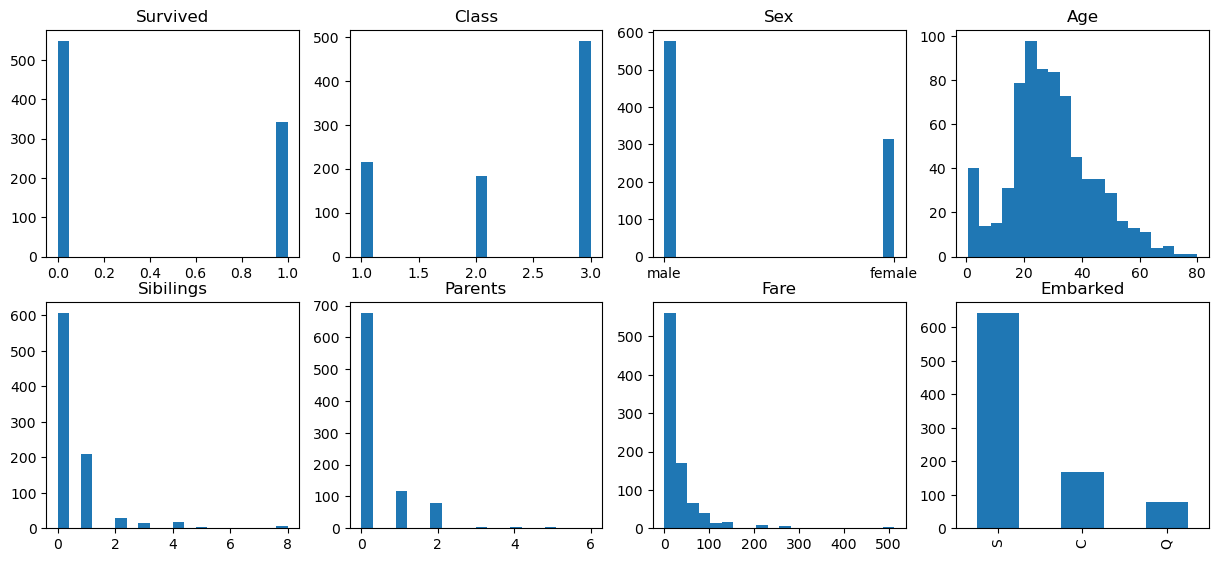

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
plt.title("Survived")
plt.hist(data.Survived,bins=20)
plt.subplot(3,4,2)
plt.title("Class")
plt.hist(data.Pclass,bins=20)
plt.subplot(3,4,3)
plt.title("Sex")
plt.hist(data.Sex,bins=20)
plt.subplot(3,4,4)
plt.title("Age")
plt.hist(data.Age,bins=20)
plt.subplot(3,4,5)
plt.title("Sibilings")
plt.hist(data.SibSp,bins=20)
plt.subplot(3,4,6)
plt.title("Parents")
plt.hist(data.Parch,bins=20)
plt.subplot(3,4,7)
plt.title("Fare")
plt.hist(data["Fare"],bins=20)
plt.subplot(3,4,8)
plt.title("Embarked")
data.Embarked.value_counts().plot(kind='bar')


In [8]:
data2 = data["Cabin"]
data3 = data2.dropna(axis=0,how="any") #borra todas las filas que tengan al menos un NaN
data4 = data3.loc[data3.str.contains("A")] #
data4

23      A6
96      A5
174     A7
185    A32
209    A31
284    A19
445    A34
475    A14
556    A16
583    A10
599    A20
630    A23
647    A26
806    A36
867    A24
Name: Cabin, dtype: object

In [9]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titles = data["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64


In [10]:
# Estadistica basica de variables númericas 
data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Crear un subset
subset = data[["PassengerId","Sex","Age","Pclass","Fare","Embarked","Survived"]]
subset_clean = subset.dropna(axis=0,how="any") #borra todas las filas que que tengan al menos un NaN
subset_clean

,PassengerId,Sex,Age,Pclass,Fare,Embarked,Survived
0,1,male,22.0,3,7.2500,S,0
1,2,female,38.0,1,71.2833,C,1
2,3,female,26.0,3,7.9250,S,1
3,4,female,35.0,1,53.1000,S,1
4,5,male,35.0,3,8.0500,S,0
...,...,...,...,...,...,...,...
885,886,female,39.0,3,29.1250,Q,0
886,887,male,27.0,2,13.0000,S,0
887,888,female,19.0,1,30.0000,S,1
889,890,male,26.0,1,30.0000,C,1


In [12]:
subset_clean.describe() # solo valores numéricos

,PassengerId,Age,Pclass,Fare,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,29.642093,2.240169,34.567251,0.404494
std,258.683191,14.492933,0.836854,52.938648,0.491139
min,1.000000,0.420000,1.000000,0.000000,0.000000
25%,222.750000,20.000000,1.000000,8.050000,0.000000
50%,445.000000,28.000000,2.000000,15.645850,0.000000
75%,677.250000,38.000000,3.000000,33.000000,1.000000
max,891.000000,80.000000,3.000000,512.329200,1.000000


In [13]:
subset_clean.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [14]:
subset_clean.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [15]:
#subset_clean["Age"].mean() #1. Media aritmética
#subset_clean["Age"].mode() #2. Moda
#subset_clean["Age"].median() # 3. Mediana
#subset_clean["Age"].var() # 5. Varianza
subset_clean["Age"].std() # 6. Desviación estándar



14.49293290032352

# 7. Cuantiles
![DIV](fig/boxplot.png)


In [16]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(subset_clean['Age'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

     5.0%  25.0%  50.0%  75.0%  95.0%
Age   4.0   20.0   28.0   38.0   56.0


## Rango intercuartilar (IQR)

In [17]:
# resta entre el primer y tercer cuartil es el IQR = rango intercuatilico (Q3-Q1=IQR)
IQR=subset_clean["Age"].quantile(0.75)-subset_clean["Age"].quantile(0.25)
print("El rango intercuartilar (IQR) es:", IQR)

El rango intercuartilar (IQR) es: 18.0


## Barras de error

In [18]:
low_bound = subset_clean["Age"].quantile(0.25) - (1.5*IQR) #inferior
upper_bound = subset_clean["Age"].quantile(0.75) + 1.5*IQR #superior
print("El límite superior es:", upper_bound)
print("El límite inferior es:", low_bound)

El límite superior es: 65.0
El límite inferior es: -7.0


Text(35, 1.1, '38.0')

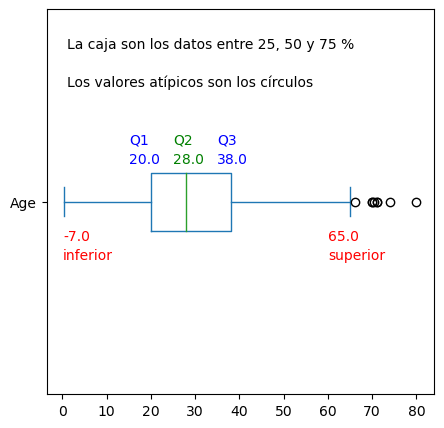

In [19]:
(subset_clean['Age']).plot.box(vert=False,figsize=(5, 5))
plt.text(1,1.4,'La caja son los datos entre 25, 50 y 75 %')
plt.text(1,1.3,'Los valores atípicos son los círculos')
plt.text(0.2,0.85,"inferior",color='r')
plt.text(0.2,0.9,low_bound,color='r')
plt.text(60,0.85,"superior",color='r')
plt.text(60,0.9,upper_bound,color='r')
plt.text(15,1.15,"Q1",color='b')
plt.text(15,1.1,subset_clean["Age"].quantile(0.25),color='b')
plt.text(25,1.15,"Q2",color='g')
plt.text(25,1.1,subset_clean["Age"].quantile(0.50),color='g')
plt.text(35,1.15,"Q3",color='b')
plt.text(35,1.1,subset_clean["Age"].quantile(0.75),color='b')

In [ ]:
subset1 = data[["Pclass","Fare"]]
cov_matrix = np.cov(subset1, bias=True) #9. matriz de covarianza
print(cov_matrix)
#sn.heatmap(cov_matrix, annot=True, fmt='g')
#plt.show()

## Crea dos columnes dummy para male y female que toman valor 1 y 0 (y 3 para Embarked) para poder hacer la matriz de correlación

In [ ]:
subset_num = data[["PassengerId","Age","Pclass","Fare","Survived"]] # solo variables  numéricas

In [ ]:
# Crea dos columnes dummy
dummy_sex = pd.get_dummies(data["Sex"],prefix="sex")
dummy_sex

In [ ]:
#agregar por columna
data2 = pd.concat([subset_num, dummy_sex], axis = 1) 
data2

In [ ]:
dummy_emb = pd.get_dummies(data["Embarked"],prefix="emb")
data3 = pd.concat([data2, dummy_emb], axis = 1)
data3

## Utilizando seaborn para graficar

https://seaborn.pydata.org/index.html

In [21]:
import seaborn as sns #statistical data visualization

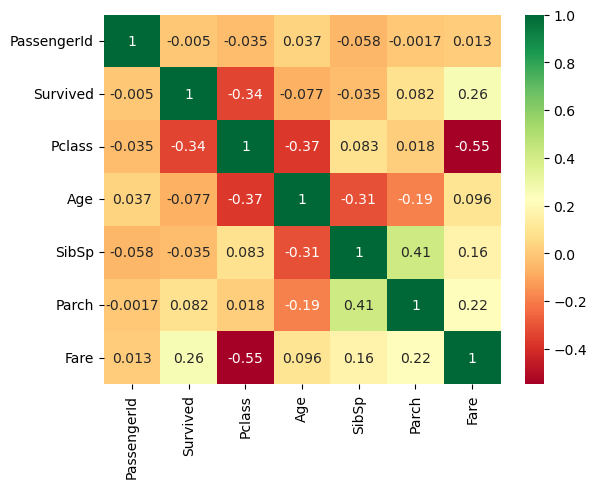

In [22]:
def titanic_corr(data): #matriz de correlación
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

titanic_corr(data)

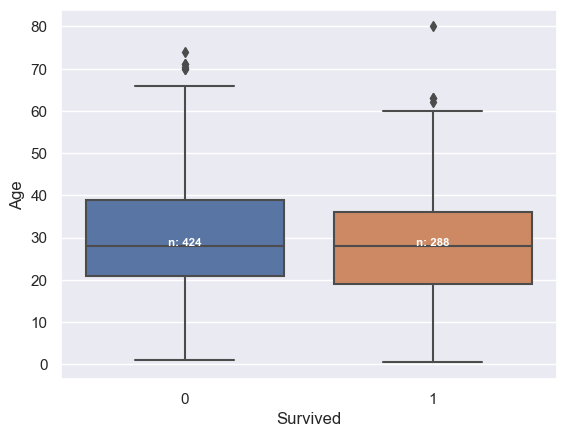

In [25]:
from numpy import std


sns.set(style="darkgrid")
df = subset_clean
 
ax = sns.boxplot(x="Survived", y="Age", data = df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['Survived'])['Age'].median().values
nobs = df['Survived'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):#El i-ésimo elemento en cada tupla 
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold'
            )
plt.show()

In [26]:
"""
Categorización de los datos en hombre/mujeres vivos/muertos
"""
live = df[(df["Survived"]==1)]
dead = df[(df["Survived"]==0)]
livem = df[(df["Survived"]==1) & (df["Sex"] == "male")]
livef = df[(df["Survived"]==1) & (df["Sex"] == "female")]
deadm = df[(df["Survived"]==0) & (df["Sex"] == "male")]
deadf = df[(df["Survived"]==0) & (df["Sex"] == "female")]
print("De los",df.shape[0], "pasajeros del titanic","sobrevivieron",live.shape[0],"y murieron",dead.shape[0])
print("De los",live.shape[0], "pasajeros que sobrevivieron",livem.shape[0],"eran hombres y",livef.shape[0],"eran mujeres")
print("De los",dead.shape[0], "pasajeros que murieron",deadm.shape[0],"eran hombres y",deadf.shape[0],"eran mujeres")

De los 712 pasajeros del titanic sobrevivieron 288 y murieron 424
De los 288 pasajeros que sobrevivieron 93 eran hombres y 195 eran mujeres
De los 424 pasajeros que murieron 360 eran hombres y 64 eran mujeres


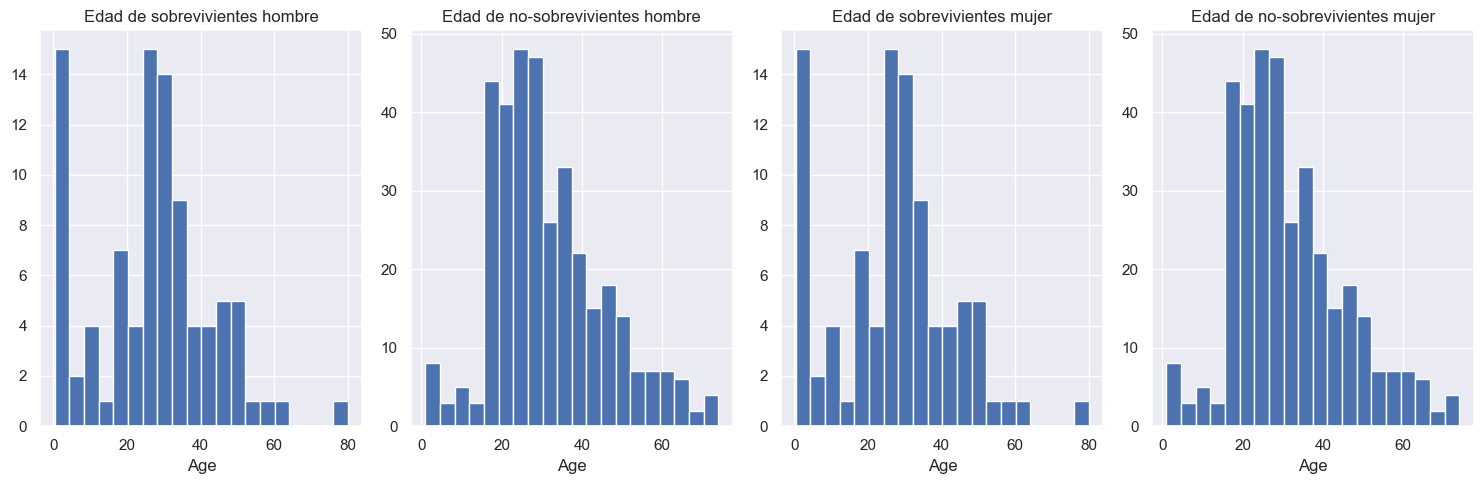

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.hist(livem["Age"],bins=20)
plt.title("Edad de sobrevivientes hombre")
plt.xlabel("Age")
plt.subplot(1,4,2)
plt.hist(deadm["Age"],bins=20)
plt.title("Edad de no-sobrevivientes hombre")
plt.xlabel("Age")
plt.subplot(1,4,3)
plt.hist(livem["Age"],bins=20)
plt.title("Edad de sobrevivientes mujer")
plt.xlabel("Age")
plt.subplot(1,4,4)
plt.hist(deadm["Age"],bins=20)
plt.title("Edad de no-sobrevivientes mujer")
plt.xlabel("Age")
plt.tight_layout()